73
<PIL.Image.Image image mode=RGB size=1440x1122 at 0x7F852A96BB38>


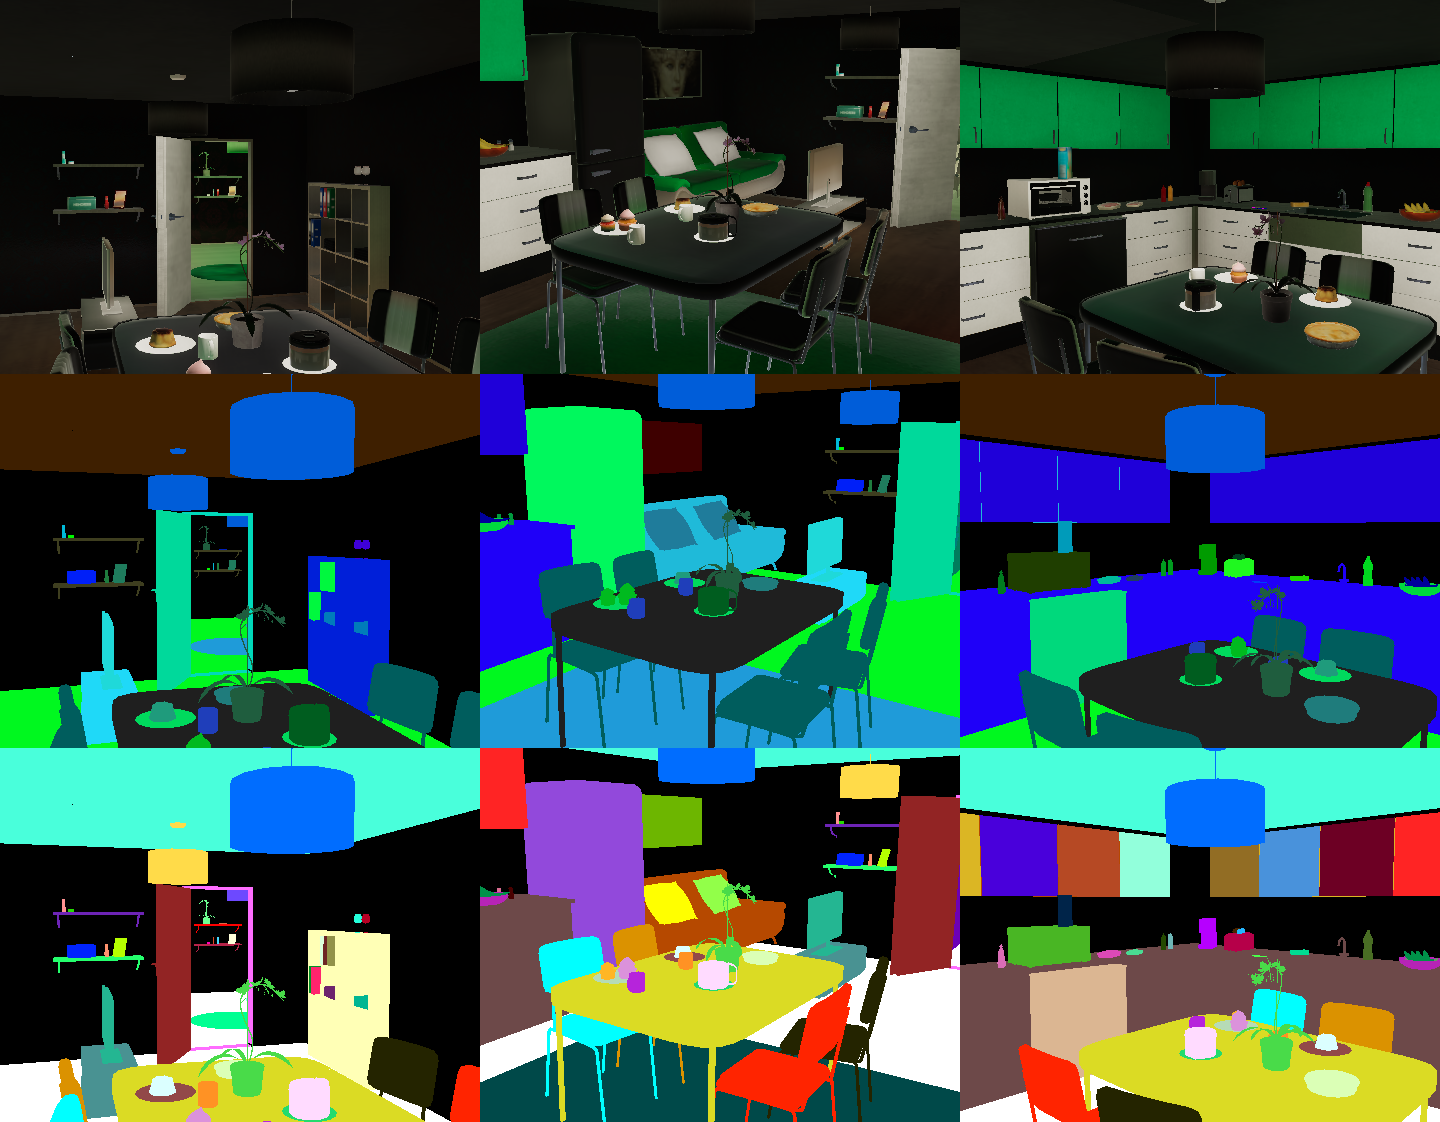

Snapshot saved in demo/snapshot_test.png


In [43]:
%matplotlib notebook
import IPython.display
# cd into virtualhome repo
import sys
sys.path.append('../simulation/')
from unity_simulator.comm_unity import UnityCommunication
import PIL
import numpy as np

mode = 'manual' # auto / manual
if mode == 'auto':
    if platform == 'darwin':
        exec_file = '../simulation/exec_mac'
    else:
        exec_file = '../simulation/exec_linux.x86_64'
    comm = UnityCommunication(file_name=exec_file)
else:
    comm = UnityCommunication()

env_id = 4 # env_id ranges from 0 to 6
comm.reset(env_id)

def display_grid_img(images_old, nrows=1):
    images = [x for x in images_old]
    h, w, _ = images[0].shape
    ncols = int((len(images)+nrows-1)/nrows)
    missing = ncols - (len(images)%ncols)
    for m in range(missing):
        images.append(np.zeros((h, w, 3)).astype(np.uint8))
    img_final = []
    for it_r in range(nrows):
        init_ind = it_r * ncols 
        end_ind = init_ind + ncols
        images_take = [images[it] for it in range(init_ind, end_ind)]
        img_final.append(np.concatenate(images_take, 1))
    img_final = np.concatenate(img_final, 0)
    img_final = PIL.Image.fromarray(img_final[:,:,::-1])
    return img_final

indices = [16,18,19] #list(range(0,20))
#s, images = comm.camera_image(indices)
#IPython.display.display(PIL.Image.fromarray(img1[:,:,::-1]))
#display_grid_img(images, nrows = 1)

def display_scene_modalities(
    comm, ids, modalities=['normal', 'seg_class', 'seg_inst', 'depth'], nrows=1):
    _, ncameras = comm.camera_count()
    cameras_select = list(range(ncameras))
    cameras_select = [cameras_select[x] for x in ids]
    imgs_modality = []
    for mode_name in modalities:
        (ok_img, imgs) = comm.camera_image(cameras_select, mode=mode_name, image_width=480, image_height=374)
        if mode_name == 'depth':
            imgs = [((x/np.max(x))*255.).astype(np.uint8) for x in imgs]
        imgs_modality += imgs
    img_final = display_grid_img(imgs_modality, nrows=nrows)
    return img_final

# Check the number of cameras
s, cam_count = comm.camera_count()
print(cam_count)
indices = [16,18,19]
# View camera from different modes
img_final = display_scene_modalities(
    comm, 
    indices, 
    modalities=['normal', 'seg_class', 'seg_inst'], nrows=3)
print(img_final)
IPython.display.display(img_final)

img_final.save("img1.png","PNG")
print('Snapshot saved in demo/snapshot_test.png')